# Entendimento do Projeto e Importação dos Dados

Aluno: Antonio Marcos Feitosa da Silva

Importação e Exploração Inicial do Dataset

In [ ]:
#Importei as bibliotecas a serem utilizadas no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/healthcare_dataset.csv')

df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6932 entries, 0 to 6931
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6932 non-null   object 
 1   Age                 6932 non-null   int64  
 2   Gender              6932 non-null   object 
 3   Blood Type          6932 non-null   object 
 4   Medical Condition   6932 non-null   object 
 5   Date of Admission   6932 non-null   object 
 6   Doctor              6932 non-null   object 
 7   Hospital            6932 non-null   object 
 8   Insurance Provider  6932 non-null   object 
 9   Billing Amount      6932 non-null   float64
 10  Room Number         6931 non-null   float64
 11  Admission Type      6931 non-null   object 
 12  Discharge Date      6931 non-null   object 
 13  Medication          6931 non-null   object 
 14  Test Results        6931 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 812.5

,Age,Billing Amount,Room Number
count,6932.000000,6932.000000,6931.000000
mean,51.898009,25617.393527,299.347280
std,19.766480,14165.407943,115.485346
min,18.000000,-1310.272895,101.000000
25%,35.000000,13350.827324,201.000000
50%,52.000000,25724.602718,302.000000
75%,69.000000,37739.926830,396.000000
max,85.000000,52271.663747,500.000000


# Limpeza e Preparação dos Dados

In [ ]:
#Verificar valores ausentes no dataset

df.isnull().sum() #Verificar quantos valores nulos temos


,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [ ]:
#Verificação de NaN
df.isna().sum() #Verificar quantos NaN temos


,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [ ]:
#Verificação de Duplicatas e Remoção

df.duplicated().sum() #Achar quantas duplicatas possui

df.drop_duplicates(inplace=True) #Eliminar as possíveis duplicatas, se possuir, dentro do dataframe

In [ ]:
df.duplicated().sum() #Verificar se ainda possui duplicatas

np.int64(0)

Alteração do tipo de dados das colunas e padronização de colunas.

In [ ]:
#Coluna de 'Date of Admission'
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

#Coluna de 'Discharge Date
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

#Verificar se foi feita a alteração
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6932 entries, 0 to 6931
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                6932 non-null   object        
 1   Age                 6932 non-null   int64         
 2   Gender              6932 non-null   object        
 3   Blood Type          6932 non-null   object        
 4   Medical Condition   6932 non-null   object        
 5   Date of Admission   6932 non-null   datetime64[ns]
 6   Doctor              6932 non-null   object        
 7   Hospital            6932 non-null   object        
 8   Insurance Provider  6932 non-null   object        
 9   Billing Amount      6932 non-null   float64       
 10  Room Number         6931 non-null   float64       
 11  Admission Type      6931 non-null   object        
 12  Discharge Date      6931 non-null   datetime64[ns]
 13  Medication          6931 non-null   object      

In [ ]:
#Alterar casas decimais na coluna 'Billing Amount'
df['Billing Amount'] = df['Billing Amount'].round(2)
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328.0,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205.0,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450.0,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458.0,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,jaCOB gaTeS,68,Female,O+,Arthritis,2021-11-21,Tamara Mendoza,Newman Ltd,UnitedHealthcare,1120.36,340.0,Emergency,2021-12-01,Penicillin,Normal
6928,cLAyton RYAn,67,Male,B+,Obesity,2022-11-13,Amber Gonzalez,Brown Group,Cigna,27544.72,459.0,Urgent,2022-11-22,Paracetamol,Inconclusive
6929,reGINA wEbb,51,Male,O+,Obesity,2023-01-17,Misty Nguyen,Thompson Group,Blue Cross,2757.37,386.0,Urgent,2023-02-13,Penicillin,Normal
6930,aRThUR PortER,42,Male,AB-,Hypertension,2022-05-25,Diana Johnson,Ayers-Bowers,UnitedHealthcare,10487.87,184.0,Elective,2022-06-02,Paracetamol,Normal


Identificação de Outliers em colunas relevantes

In [ ]:
#Identificação geral dos outliers
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,6932.000000,6932,6932.000000,6931.000000,6931
mean,51.898009,2021-10-26 09:37:29.740334592,25617.393485,299.347280,2021-11-11 00:51:06.570480640
min,18.000000,2019-05-08 00:00:00,-1310.270000,101.000000,2019-05-11 00:00:00
25%,35.000000,2020-07-23 18:00:00,13350.830000,201.000000,2020-08-08 00:00:00
50%,52.000000,2021-10-28 00:00:00,25724.600000,302.000000,2021-11-12 00:00:00
75%,69.000000,2023-01-25 00:00:00,37739.925000,396.000000,2023-02-08 00:00:00
max,85.000000,2024-05-07 00:00:00,52271.660000,500.000000,2024-06-01 00:00:00
std,19.766480,NaN,14165.407961,115.485346,NaN


In [ ]:
#Outliers 'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

age_limite_inferior = df['Age'] <= Q1_age - 1.5 * IQR_age
age_limite_superior = df['Age'] >= Q3_age + 1.5 * IQR_age

In [ ]:
#Outliers 'Billing Amount'
Q1_billing = df['Billing Amount'].quantile(0.25)
Q3_billing = df['Billing Amount'].quantile(0.75)
IQR_billing = Q3_billing - Q1_billing

filtro_billing = (df['Billing Amount'] >= Q1_billing - 1.5 * IQR_billing) & (df['Billing Amount'] <= Q3_billing + 1.5 * IQR_billing)

filtro_billing

,Billing Amount
0,True
1,True
2,True
3,True
4,True
...,...
6927,True
6928,True
6929,True
6930,True


In [ ]:
#Importação do dataframe limpo para CSV
df.to_csv('df_clean.csv')

# Análise Exploratória e Estatísticas Descritivas

Identificação da média, mediana e desvio-padrão das Idades

In [ ]:
#Leitura do dataframe limpo para analise exploratoria
df_clean = pd.read_csv('/content/df_clean.csv')

In [ ]:
#Média
idade_media = df_clean['Age'].mean().round(0)
idade_media

np.float64(52.0)

In [ ]:
#Mediana
idade_mediana = df_clean['Age'].median()
idade_mediana

52.0

In [ ]:
#Desvio-padrão
idade_desvio_padrao = df_clean['Age'].std()
idade_desvio_padrao

19.766480068883933

Identificação da média, mediana e desvio-padrão de 'Billing Amount'

In [ ]:
#Média
billing_media = df_clean['Billing Amount'].mean().round(2)
billing_media

np.float64(25544.31)

In [ ]:
#Mediana
billing_mediana = df_clean['Billing Amount'].median()
billing_mediana

25542.75

In [ ]:
#Desvio-padrão
billing_desvio_padrao = df_clean['Billing Amount'].std()
billing_desvio_padrao

14208.409714872345

Distribuição de frequências para variáveis categóricas

In [ ]:
#Relação entre 'Medical Condition' e 'Gender'

condicao_sexo = df_clean.groupby('Gender')['Medical Condition'].value_counts()
condicao_sexo

#exportar para csv
condicao_sexo.to_csv('condicao_sexo.csv')

In [ ]:
#Incidência de Cancer entre mulheres

female_cancer = df_clean.groupby('Gender')['Medical Condition']

In [ ]:
insurance_condition_count = df_clean.groupby('Insurance Provider')['Medical Condition'].value_counts().sort_index()
display(insurance_condition_count.head())
insurance_condition_count.to_csv('insurance_condition_count.csv')

Insurance Provider  Medical Condition
Aetna               Arthritis            240
                    Asthma               236
                    Cancer               229
                    Diabetes             228
                    Hypertension         232
Name: count, dtype: int64

In [ ]:
medication_gender_count = df_clean.groupby('Medication')['Gender'].value_counts().sort_index()
display(medication_gender_count.head())
medication_gender_count.to_csv('medication_gender_count.csv')

Medication  Gender
Aspirin     Female    689
            Male      668
Ibuprofen   Female    735
            Male      677
Lipitor     Female    681
Name: count, dtype: int64

In [ ]:
#Relação entre 'Age' e 'Medical Condition'

age_condition = df_clean.pivot_table(values='Medical Condition', index='Age', columns='Gender',
                               aggfunc='value_counts')
age_condition

#Tratamento de NaN
age_condition.fillna(0, inplace=True)
age_condition

Gender                 Female  Male
Age Medical Condition              
18  Arthritis              11     3
    Asthma                 11     7
    Cancer                  8    10
    Diabetes               10    13
    Hypertension           12     6
...                       ...   ...
85  Asthma                  4    14
    Cancer                  9     6
    Diabetes                8     8
    Hypertension            7     8
    Obesity                10     1

[408 rows x 2 columns]

In [ ]:
#Contagem de pacientes por 'Medical Condition'
medical_count = df_clean['Medical Condition'].value_counts()
medical_count

#Exportar para csv
medical_count.to_csv('medical_count.csv')

In [ ]:
#Relação entre 'Blood Type' e 'Medical Condition'
type_medical = df_clean.pivot_table(values='Blood Type', columns='Medical Condition', index='Age',
                              aggfunc='value_counts')
type_medical

#Remoção de NaN
type_medical.fillna(0, inplace=True)
type_medical

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Age Blood Type                                                               
18  A+                   1.0     1.0     3.0       5.0           1.0      3.0
    A-                   1.0     4.0     3.0       3.0           1.0      4.0
    AB+                  2.0     3.0     1.0       2.0           3.0      3.0
    AB-                  1.0     1.0     3.0       2.0           3.0      1.0
    B+                   0.0     2.0     1.0       4.0           2.0      1.0
...                      ...     ...     ...       ...           ...      ...
85  AB-                  2.0     3.0     1.0       2.0           0.0      1.0
    B+                   2.0     2.0     1.0       2.0           1.0      1.0
    B-                   1.0     1.0     0.0       3.0           3.0      2.0
    O+                   3.0     3.0     3.0       1.0           3.0      3.0
    O-                   1.0     1.0     6.0       2.0           1.0      0.0

[544 rows x 6 columns]

In [ ]:
#Relação entre 'Name' e 'Hospital' -> hospitais com mais pacientes
contagem_hospital = df_clean['Hospital'].value_counts(ascending=False)
contagem_hospital

#Exportar para csv
contagem_hospital.to_csv('contagem_hospital.csv')

In [ ]:
#Relação entre 'Medical Condition', 'Hospital' e 'Insurance Provider'
#Encontrar os hospitais especializado/mais demanda em determinada doença
contagem_hospital_condicao = df_clean.pivot_table(values='Medical Condition', columns='Hospital', index='Insurance Provider',
                              aggfunc='value_counts')
contagem_hospital_condicao

#Remoção de NaN
contagem_hospital_condicao.fillna(0, inplace=True)
contagem_hospital_condicao

#Exportar para csv
contagem_hospital_condicao.to_csv('contagem_hospital_condicao.csv')

In [ ]:
#Média de custo por tipo de tratamento
media_tratamento = df_clean.pivot_table(values='Billing Amount', columns='Medical Condition',
                                        index='Hospital', aggfunc='mean')
media_tratamento['Arthritis'].round(2)
media_tratamento['Asthma'].round(2)
media_tratamento['Diabetes'].round(2)
media_tratamento['Cancer'].round(2)
media_tratamento['Hypertension'].round(2)
media_tratamento['Obesity'].round(2)
media_tratamento
#Remoção de NaN
media_tratamento.fillna(0, inplace=True)
media_tratamento

#Exportar para csv
media_tratamento.to_csv('media_tratamento.csv')

In [ ]:
#Média de Tratamento por idades
mean_age = df_clean.pivot_table(values='Billing Amount', index='Age',
                                columns='Medical Condition', aggfunc='mean')

mean_age.fillna(0, inplace=True)
mean_age.round(2)

#Exportar para csv
mean_age.to_csv('mean_age.csv')

mean_age['Arthritis'].round(2)
mean_age['Asthma'].round(2)
mean_age['Diabetes'].round(2)
mean_age['Cancer'].round(2)
mean_age['Hypertension'].round(2)
mean_age['Obesity'].round(2)

mean_age.round(2)


Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Age,,,,,,
18,26230.88,22322.16,29612.92,28618.31,30437.29,30267.72
19,24240.71,24498.00,27506.38,22790.02,28802.49,28705.82
20,20920.85,24098.37,25883.10,26798.72,24707.74,27734.42
21,23599.42,22572.53,21743.42,19673.76,26013.14,30469.03
22,28299.19,29082.98,23700.29,25847.44,29440.35,25871.65
...,...,...,...,...,...,...
81,21307.35,27149.00,27269.57,20603.24,31037.79,24322.60
82,22373.03,28879.04,23997.98,22266.68,22265.47,30091.16
83,26731.36,31130.65,21904.72,27683.15,29974.63,26382.14


In [ ]:
#Quantidade de pacientes por seguradora
count_insurance = df_clean['Insurance Provider'].value_counts()
count_insurance

#Importar para csv
count_insurance.to_csv('count_insurance.csv')

In [ ]:
#Quantidade de pacientes por hospital
count_hospital = df_clean['Hospital'].value_counts()
count_hospital

#Exportar para csv
count_hospital.to_csv('count_hospital.csv')

In [ ]:
#Relação entre 'Medical condition' e 'Admission Type'
condition_type = df_clean.groupby('Admission Type')['Medical Condition'].value_counts()
condition_type

#Exportar para csv
condition_type.to_csv('condition_type.csv')

In [ ]:
#Soma de tratamento por 'Medical Condition' e 'Admission Type'
sum_billing_type = df_clean.pivot_table(values='Billing Amount', columns='Medical Condition',
                                         index='Admission Type', aggfunc='sum')

#Exportar o dataframe para csv
sum_billing_type.to_csv('sum_billing_type.csv')

In [ ]:
#Relação entre 'Medical Condition' e 'Test Results'
condition_test = df_clean.groupby('Test Results')['Medical Condition'].value_counts()
condition_test

#Exportar em csv
condition_test.to_csv('condition_test.csv')

In [ ]:
#Quantidade de pacientes por sexo em cada hospital
sex_hospital = df_clean.pivot_table(values='Gender', columns='Hospital',
                                     index='Age', aggfunc='value_counts')
sex_hospital

#Limpeza de NaN
sex_hospital.fillna(0, inplace=True)
sex_hospital

#Exportar para csv
sex_hospital.to_csv('sex_hospital.csv')

In [ ]:
#Relação entre 'Medication', 'Admission Type' e 'Medical Condition'
tratament_condition = df_clean.pivot_table(values='Medical Condition', columns='Admission Type',
                                           index='Medication', aggfunc='value_counts')
tratament_condition

#Exportar para csv
tratament_condition.to_csv('tratament_condition.csv')

# Transformações e Enriquecimento dos Dados

Criação de novas colunas no dataframe a partir da Análise Exploratória anterior

In [ ]:
#Classificação da faixa etária dos pacientes
faixa_idade = [
    df_clean['Age'] <= 18,
    df_clean['Age'] <= 65
]

faixa_etaria = [
    'children or teen',
    'adult'
]

df_clean['Age Range'] = np.select(faixa_idade, faixa_etaria, default='elderly')
df_clean

#Exportar para o csv
df_clean.to_csv('df_clean.csv')

In [ ]:
#Normalização de 'Billing Amount'
df_clean['Billing Amount Standardized'] = (df_clean['Billing Amount'] - df_clean['Billing Amount'].min()) / (df_clean['Billing Amount'].max() - df_clean['Billing Amount'].min())
df_clean

#Exportar para csv
df_clean.to_csv('df_clean_standardized.csv')

In [ ]:
#Criar uma nova coluna para pacientes endividados
billing_source = [
    df_clean['Billing Amount'] < 0,
    df_clean['Billing Amount'] >= 0
]

billing_debt = [
    'not debt',
    'debt'
]

df_clean['Hospital debt'] = np.select(billing_source, billing_debt, default= 'unspecified')

#Exportar para csv
df_clean.to_csv('df_clean_debt.csv')

# Visualização dos Dados

In [ ]:
#Importação da biblioteca Seaborn
import seaborn as sns

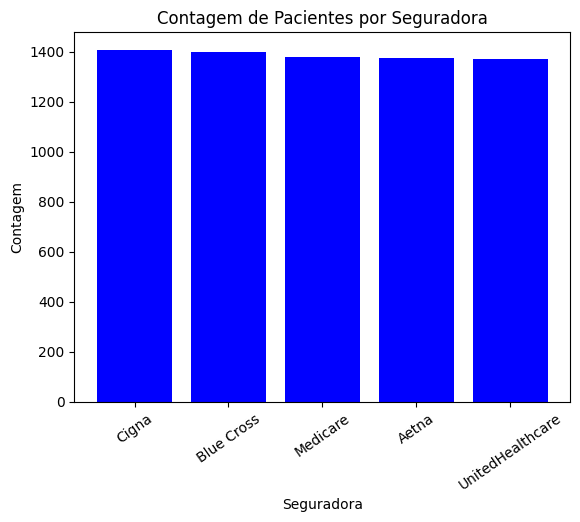

In [ ]:
#Contagem de pacientes por seguradora

provider_count = pd.read_csv('/content/count_insurance.csv')

eixo_x = provider_count['Insurance Provider']
eixo_y = provider_count['count']


plt.bar(eixo_x, eixo_y, color='blue', '')
plt.title('Contagem de Pacientes por Seguradora')
plt.xlabel('Seguradora')
plt.ylabel('Contagem')
plt.xticks(rotation=35)
plt.show()

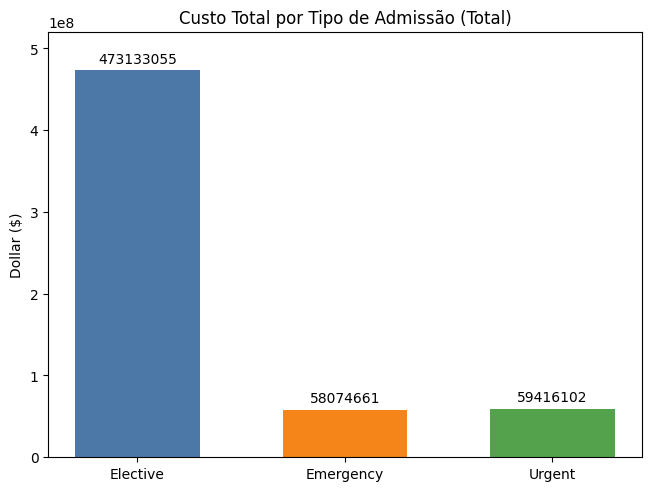

In [ ]:
#Gráfico que traz os custos totais por admissão

type_adm = ('Elective', 'Emergency', 'Urgent')
type_billing = {
    'Elective': (78018518.03, 77504242.81, 79942117.69, 78903370.34, 81316292.55, 77448513.84),
    'Emergency': (9247726.72, 10147057.22, 9971358.21, 9768281.19, 9201474.46, 9738763.69),
    'Urgent': (10361951.16, 9693604.57, 9476649.18, 9585882.22, 9824014.83, 10474000.31)
}

totals = [sum(type_billing[k]) for k in type_adm]

x = np.arange(len(type_adm))
width = 0.6

fig, ax = plt.subplots(layout='constrained')
rects = ax.bar(x, totals, width, color=['#4C78A8','#F58518','#54A24B'], label='Total')

ax.bar_label(rects, padding=3, fmt='%.0f')
ax.set_xticks(x)
ax.set_xticklabels(type_adm)

ax.set_ylabel('Dollar ($)')
ax.set_title('Custo Total por Tipo de Admissão (Total)')
ax.set_ylim(0, max(totals)*1.1)

plt.show()


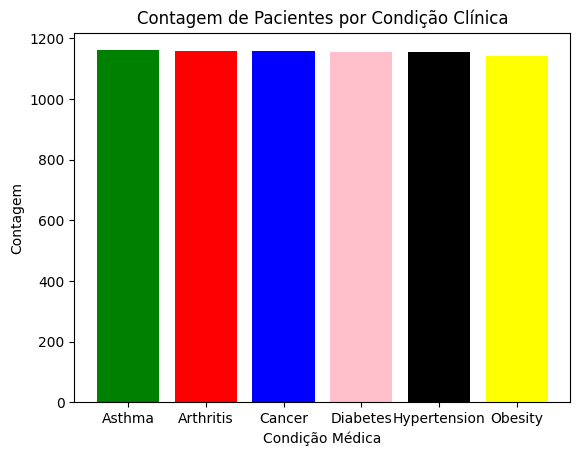

In [ ]:
#Total de pacientes por condição médica

contagem_medical = pd.read_csv('/content/medical_count.csv')

eixo_x = contagem_medical['Medical Condition']
eixo_y = contagem_medical['count']

bar_color = ['green', 'red', 'blue', 'pink', 'black', 'yellow']

plt.bar(eixo_x, eixo_y, color=bar_color)
plt.title('Contagem de Pacientes por Condição Clínica')
plt.xlabel('Condição Médica')
plt.ylabel('Contagem')
#plt.xticks(rotation=35)
plt.show()

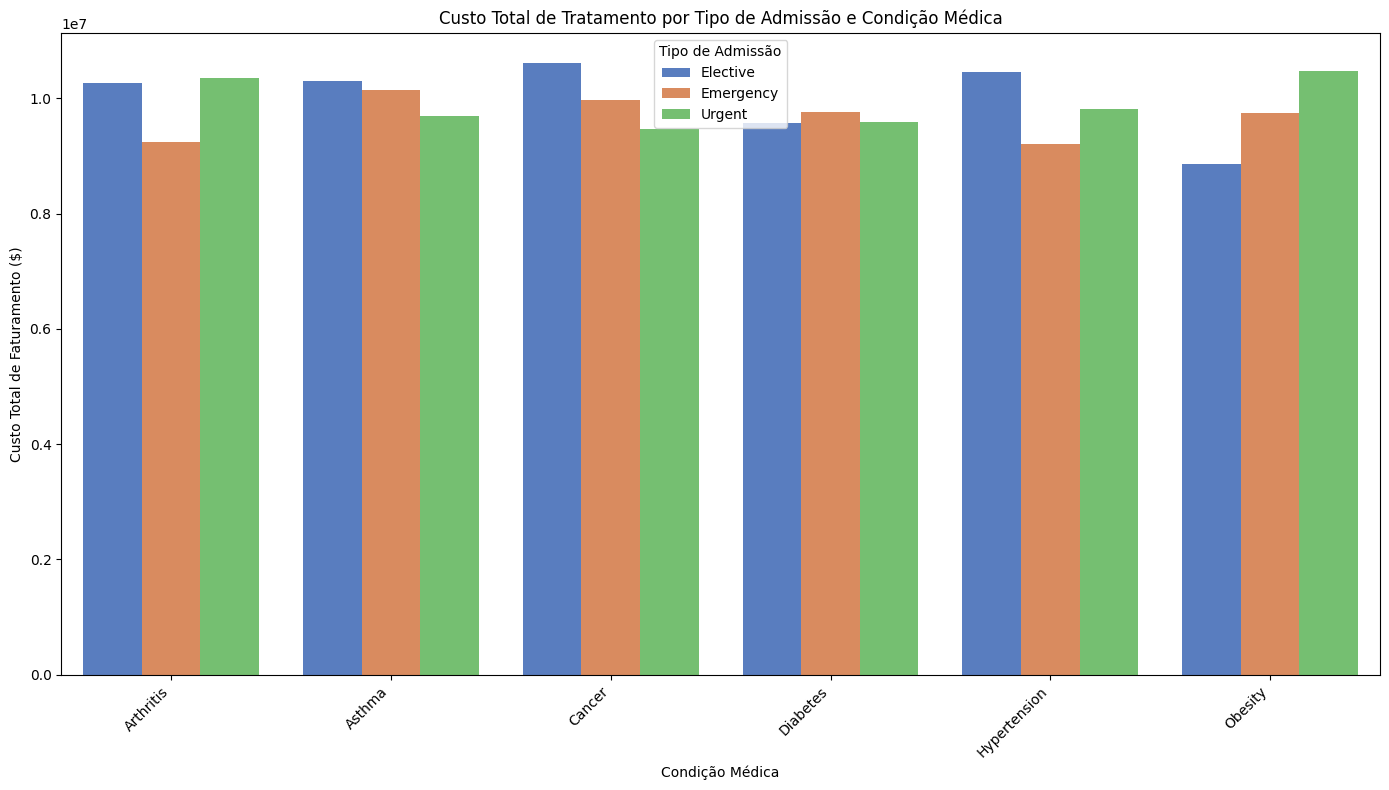

In [ ]:
# Custo Total de Tratamento por Tipo de Admissão e Condição Médica
sum_billing_type_df = pd.read_csv('/content/sum_billing_type.csv')
sum_billing_type_df_melted = sum_billing_type_df.melt(id_vars='Admission Type', var_name='Medical Condition', value_name='Total Billing Amount')

plt.figure(figsize=(14, 8))
sns.barplot(x='Medical Condition', y='Total Billing Amount', hue='Admission Type', data=sum_billing_type_df_melted, palette='muted')
plt.title('Custo Total de Tratamento por Tipo de Admissão e Condição Médica')
plt.xlabel('Condição Médica')
plt.ylabel('Custo Total de Faturamento ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Admissão')
plt.tight_layout()
plt.show()

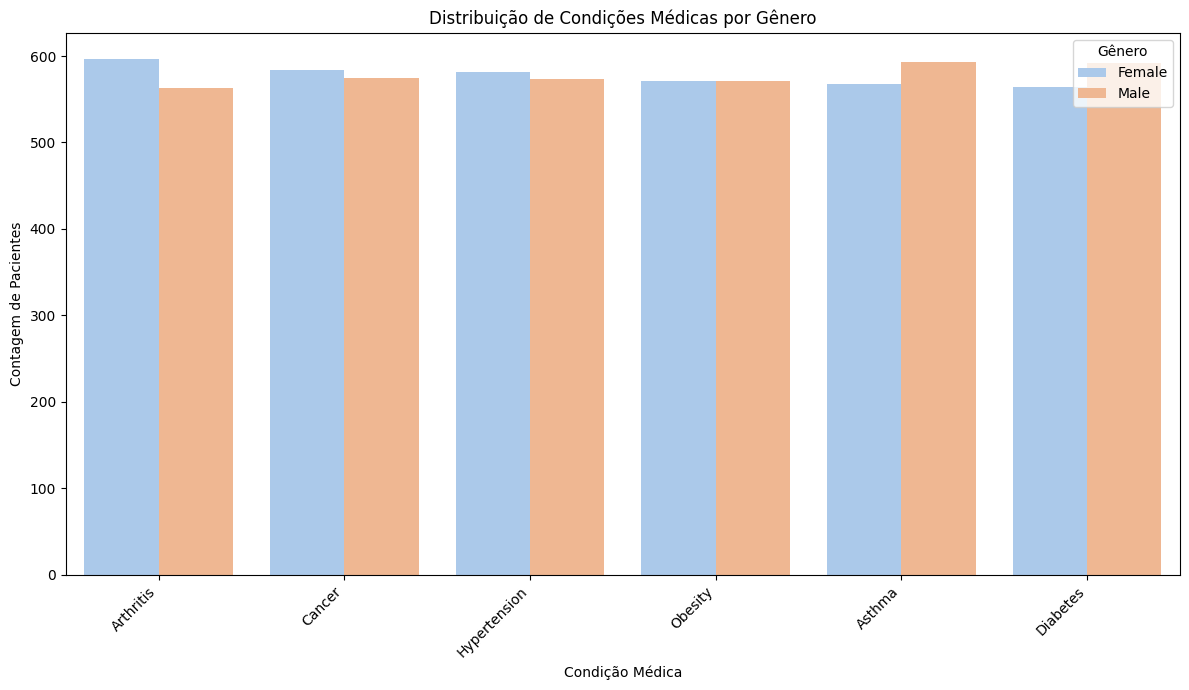

In [ ]:
# Distribuição de Condições Médicas por Gênero
condicao_sexo_df = pd.read_csv('/content/condicao_sexo.csv')
condicao_sexo_df.columns = ['Gender', 'Medical Condition', 'Count']

plt.figure(figsize=(12, 7))
sns.barplot(x='Medical Condition', y='Count', hue='Gender', data=condicao_sexo_df, palette='pastel')
plt.title('Distribuição de Condições Médicas por Gênero')
plt.xlabel('Condição Médica')
plt.ylabel('Contagem de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3625478565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hospital', y='count', data=hospital_counts_top10, palette='viridis')


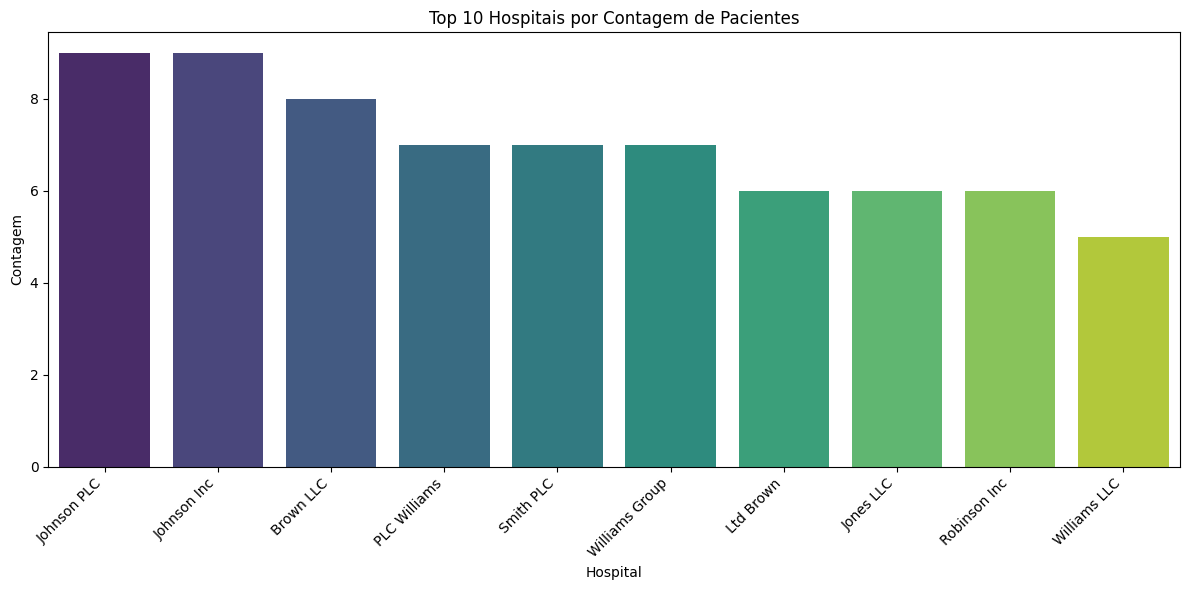

In [ ]:
#Contagem de pacientes por hospital (Top 10)
hospital_counts = pd.read_csv('/content/contagem_hospital.csv')
hospital_counts_top10 = hospital_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Hospital', y='count', data=hospital_counts_top10, palette='viridis')
plt.title('Top 10 Hospitais por Contagem de Pacientes')
plt.xlabel('Hospital')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Relatório Final

- Quais foram os principais padrões identificados?

    *   **Distribuição de Custos por Tipo de Admissão:** As admissões do tipo 'Elective' (Eletivas) apresentaram um custo total de faturamento significativamente maior em comparação com 'Emergency' (Emergência) e 'Urgent' (Urgente). Isso é um padrão muito claro nos dados.
    *   **Distribuição Equilibrada de Condições Médicas:** As seis condições médicas principais ('Asthma', 'Arthritis', 'Cancer', 'Diabetes', 'Hypertension', 'Obesity') estão distribuídas de forma bastante uniforme em termos de contagem de pacientes, sem que nenhuma se destaque drasticamente das outras.
    *   **Distribuição de Condições Médicas por Gênero:** A prevalência das condições médicas é notavelmente equilibrada entre os gêneros, sem diferenças marcantes na contagem de pacientes por condição entre homens e mulheres.
    *   **Provedores de Seguro:** Os cinco principais provedores de seguro ('Cigna', 'Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare') têm uma distribuição muito semelhante de pacientes, indicando uma concorrência ou divisão de mercado relativamente equilibrada.
    *   **Fragmentação de Hospitais:** Há uma grande quantidade de hospitais únicos no dataset, com os 'Top 10 Hospitais' tendo um número relativamente baixo de pacientes (5 a 9), sugerindo uma alta fragmentação no ambiente hospitalar ou a existência de muitos hospitais menores, ou um problema de padronização nos nomes dos hospitais.

- Houve algum comportamento inesperado nos dados?

    *   **Valores Negativos em 'Billing Amount':** A presença de valores negativos na coluna 'Billing Amount' (custo de faturamento) é um comportamento inesperado. Isso pode indicar reembolsos, ajustes financeiros ou erros de entrada de dados que merecem uma investigação mais aprofundada para entender sua natureza e impacto.
    *   **Extrema Variedade de Nomes de Hospitais:** A enorme quantidade de nomes de hospitais distintos, muitos com apenas um ou poucos pacientes, é um comportamento que pode dificultar a análise e agregação de dados hospitalares sem um tratamento adicional de padronização ou categorização.

- Quais hipóteses podem ser exploradas em futuras análises?

    *   **Causas dos Custos Elevados de Admissões Eletivas:** Investigar por que as admissões 'Elective' (Eletivas) têm custos tão mais altos. Isso pode envolver a análise da duração da internação, tipo de procedimento, idade do paciente, e outras variáveis associadas a esses tratamentos.
    *   **Relação entre Medicação e Resultados de Testes:** Explorar se tipos específicos de medicação estão correlacionados com melhores ou piores resultados de testes para determinadas condições médicas.
    *   **Especialização Hospitalar:** Embora o dataset mostre muitos hospitais, poderia ser interessante verificar se existe alguma especialização regional ou por condição médica entre os hospitais (ex: alguns hospitais são mais procurados para Câncer, outros para Doenças Cardíacas, etc.), o que poderia impactar o volume de pacientes e o faturamento.
    *   **Duração da Internação e Faturamento:** Criar uma nova coluna para 'Duração da Internação' (calculando a diferença entre 'Date of Admission' e 'Discharge Date') e analisar sua correlação com o 'Billing Amount' e as 'Medical Conditions'.
    *   **Impacto da Idade e Gênero em Custos Específicos:** Aprofundar a análise de como a faixa etária e o gênero influenciam os custos médios de tratamento para condições médicas específicas, além da simples contagem de pacientes.